In [23]:
import matplotlib.pyplot as plt
import random

In [24]:
from typing import List, Tuple, Callable, TypeVar, Iterator

Vector = List[float]
Number = int
Numbers = List[Number]
Matrix = List[Vector]

In [25]:
%run linear_algebra.ipynb

[4, 6, 7]


In [26]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

In [27]:
def square(x):
    return x * x

def derivative(x):
    return 2 * x

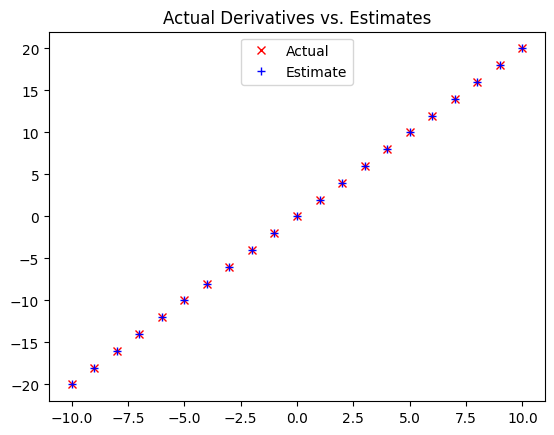

In [28]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.0001) for x in xs]

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [29]:
def partial_difference_quotient(
    f: Callable[[Vector], float], v: Vector, i: int, h: float
) -> float:
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h


def estimate_gradient(
    f: Callable[[Vector], float], v: Vector, h: float = 0.0001
) -> Vector:
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

In [30]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return v_add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001

0 [9.064569551751351, -5.771046915433146, -1.8163693906811746]
1 [8.883278160716324, -5.655625977124483, -1.7800420028675512]
2 [8.705612597501998, -5.542513457581993, -1.7444411628102001]
3 [8.531500345551958, -5.4316631884303535, -1.7095523395539962]
4 [8.360870338640918, -5.323029924661746, -1.6753612927629162]
5 [8.1936529318681, -5.2165693261685115, -1.641854066907658]
6 [8.029779873230737, -5.112237939645142, -1.609016985569505]
7 [7.869184275766123, -5.009993180852239, -1.576836645858115]
8 [7.7118005902508004, -4.909793317235194, -1.5452999129409526]
9 [7.557564578445785, -4.81159745089049, -1.5143939146821335]
10 [7.4064132868768695, -4.7153655018726806, -1.4841060363884908]
11 [7.258285021139332, -4.621058191835227, -1.454423915660721]
12 [7.113119320716545, -4.528637027998522, -1.4253354373475067]
13 [6.970856934302214, -4.438064287438552, -1.3968287286005565]
14 [6.83143979561617, -4.349303001689781, -1.3688921540285455]
15 [6.694810999703846, -4.262316941655985, -1.3415143

In [31]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]


def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = predicted - y
    squared_error = error**2
    grad = [2 * error * x, 2 * error]
    return grad

In [32]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

print("slope", slope)
print("intercept", intercept)

0 [33.881286921193954, 0.42514822456904483]
1 [10.736606771788189, 0.4481792150411007]
2 [26.17413146243232, 0.4480194633828067]
3 [15.877302334021023, 0.4632975559184734]
4 [22.745302640763896, 0.46824826314065743]
5 [18.16435138687362, 0.48005706925514]
6 [21.21985768202455, 0.48726130650350336]
7 [19.18184218739613, 0.4975066415725209]
8 [20.541208767648353, 0.505693470476772]
9 [19.634519445449026, 0.5152232923034669]
10 [20.2392907531778, 0.523827365164309]
11 [19.83591689499557, 0.5330190011871582]
12 [20.104976450039143, 0.5417888800797794]
13 [19.925522496703973, 0.5508102787696589]
14 [20.04522730497722, 0.5596341807088236]
15 [19.965393021760903, 0.5685601396523832]
16 [20.01865141462513, 0.5773884123948393]
17 [19.983136894857434, 0.5862522869846747]
18 [20.006833943417075, 0.5950629193055628]
19 [19.991036822660117, 0.6038796274103687]
20 [20.001582318913112, 0.6126629049782081]
21 [19.994557256189932, 0.6214391614871648]
22 [19.999251749282802, 0.6301908404203804]
23 [19.9

In [33]:
T = TypeVar('T')

def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    if shuffle: random.shuffle(batch_starts)
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [34]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

print("slope", slope)
print("intercept", intercept)

0 [17.83291639228137, -1.4140255944676658]
1 [20.238681538059936, -1.3088621341573843]
2 [19.77729123037143, -1.1802110151158822]
3 [20.154673596502057, -1.1152804739874969]
4 [19.664894557728772, -1.0967550160349224]
5 [19.768027212568423, -1.071777836061203]
6 [18.602760040607098, -1.00937878311956]
7 [18.53018472557912, -0.9917657904380515]
8 [22.420007384827038, -0.893862633993225]
9 [20.157676383818718, -0.7318962313829717]
10 [20.040577020706156, -0.6994098786074302]
11 [20.06520175961877, -0.6656012897614301]
12 [19.77312212456388, -0.5437073269576609]
13 [19.117145152946154, -0.4136651321378519]
14 [20.02406359725917, -0.3345118922378548]
15 [20.188146366194744, -0.28298156683865505]
16 [19.791662940362947, -0.044322716396969254]
17 [19.926518641477507, -0.04191562605510669]
18 [21.99722218743597, 0.08359542686833649]
19 [19.906424508192288, 0.010817472924570033]
20 [20.18297501808417, 0.08233444479860676]
21 [20.062700537756495, 0.11180436255414719]
22 [19.94471959127596, 0.12

In [35]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

print("slope", slope)
print("intercept", intercept)

0 [20.09389019671471, 0.3268907369279543]
1 [20.089861313459345, 0.5273847215890431]
2 [20.086005903475446, 0.7192767468204944]
3 [20.082315937012815, 0.9029358819130212]
4 [20.07878428771999, 1.0787153495128117]
5 [20.075404142362636, 1.246953216711211]
6 [20.07216900474833, 1.4079730459746778]
7 [20.069072695505966, 1.5620845186067804]
8 [20.066109203167077, 1.7095840291307136]
9 [20.06327288034208, 1.850755255584448]
10 [20.060558225036324, 1.9858697051838958]
11 [20.057960060071878, 2.1151872365269866]
12 [20.055473362082274, 2.2389565595009273]
13 [20.05309335314821, 2.3574157130536024]
14 [20.050815431006665, 2.470792522925997]
15 [20.048635251131735, 2.579305040558755]
16 [20.04654862294794, 2.68316196289256]
17 [20.044551514892174, 2.782563032659216]
18 [20.04264008749107, 2.8776994225601142]
19 [20.040810670689215, 2.9687541034265417]
20 [20.039059739581678, 3.0559021959159356]
21 [20.037383923455522, 3.1393113071806957]
22 [20.035780019167188, 3.2191418537189618]
23 [20.03424